In [1]:
# Atividade 3 - Seleção de Modelos com teste T

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('mini_mnist.csv')
df.tail()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,digito
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
X = df.loc[:, df.columns != 'digito']
y = df['digito']

# normalização
ss = StandardScaler()
ss.fit(X)
X_ss = ss.transform(X)

X_ss = pd.DataFrame( np.hstack((X_ss, df['digito'].values.reshape((-1,1)) )), columns=df.columns)
#X_ss.tail()

#sns.pairplot(data=X_ss, hue='digito')

<AxesSubplot:xlabel='PC 0', ylabel='PC 1'>

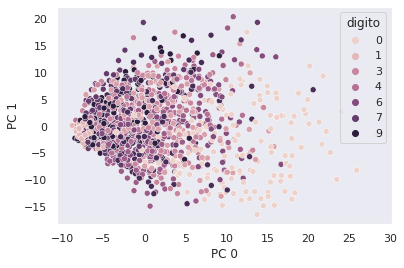

In [18]:
pca = PCA(n_components=2)
X_pca_ss = X_ss.loc[:, X_ss.columns != 'digito']

pca.fit(X_pca_ss)
X_pca_ss = pca.transform(X_pca_ss)

X_pca_ss = pd.DataFrame(X_pca_ss, columns=['PC 0', 'PC 1'])

sns.scatterplot(data=X_pca_ss, x='PC 0', y='PC 1', hue=df['digito'])